In [1]:
import pickle as pkl
from hc_lib.plots.figlib import FigureLibrary
import numpy as np
import seaborn as sbn
import copy
import matplotlib as mpl
import matplotlib.pyplot as plt
from hc_lib.plots.container import PostResult

/software/spack-software/2020.05.14/linux-rhel8-ivybridge/gcc-8.4.0/python-3.7.7-zgcjuclie3fiis4ljkrfp4c4j6fkoa62/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def load(box, snap, axis, res, filename, dirname = 'fiducial'):
    base = '/lustre/cosinga/hcolor/output/'
    path = '%s%s_%sB_%03dS_%dA_%dR/results/'%(base, dirname, box, snap, axis, res)
    filepath = '%s%s_%sB_%03dS_%dA_%dR.pkl_rlib.pkl'%(path, filename, box, snap, axis, res)
    f = pkl.load(open(filepath, 'rb'))
    return f

In [3]:
box = 'tng100'
snap = 99
axis = [0, 1, 2]
res = 800
files = ['hisubhaloXgalaxy', 'hiptlXgalaxy', 'vnXgalaxy']
flib_og = FigureLibrary()
dirnames = ['fiducial', 'axis_test1', 'axis_test2']
for f in files:
    for a in range(len(axis)):
        flib_og.addResults(load(box, snap, axis[a], res, f, dirnames[a]))


# Cross Power Check (all Redshift Space)

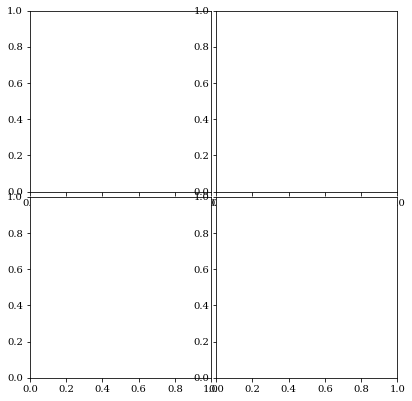

In [32]:
flib = copy.copy(flib_og)
flib.createFigGrid(2, 2, panel_length = 2.5)
fig, panels = flib.getFig()
dim = flib.getDim()
ip = {}
ip['is_auto'] = False
ip['space'] = 'redshift'
ip['gal_res'] = 'diemer'
ip['is_particle'] = True
ip['color_cut'] = '0.60'
flib.arrangeResults(ip, 'fieldname', ['hiptl', 'vn'], 'color', ['red', 'blue'], 'axis');

In [33]:

sbncols = sbn.color_palette('hls', len(axis))
coldict = {}
for z in range(len(axis)):
    coldict[axis[z]] = sbncols[z]
for i in range(dim[0]):
    for j in range(dim[1]):
        idx = (i, j)
        p = panels[idx]
        fcolor = mpl.colors.to_rgba('tan', 0.3)
        p.set_facecolor(fcolor)
        for a in range(len(axis)):
            ip = {'axis':axis[a]}
            lkw = {}
            lkw['color'] = coldict[a]
            lkw['label'] = 'axis=%d'%axis[a]
            if i == 1:
                 
                flib.plotLine(idx, ip, line_kwargs = lkw)
            elif i == 0:
                flib.plotFill(idx, ip, fill_kwargs = lkw)

In [34]:
# axes
help(flib)

Help on FigureLibrary in module hc_lib.plots.figlib object:

class FigureLibrary(builtins.object)
 |  FigureLibrary(rlib=None, result_type='pk')
 |  
 |  Methods defined here:
 |  
 |  __init__(self, rlib=None, result_type='pk')
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  addColorRatios(self, idx, reds, blues)
 |  
 |  addLegend(self, idx=(0, 0), kwargs={'fontsize': 10, 'frameon': False, 'loc': 'upper right'})
 |  
 |  addResults(self, rlib)
 |      ################ DATA ACCESS/MANAGEMENT ############################################
 |  
 |  arrangePerPanel(self, iprops_per_panel, rmprops_per_panel, rowp='', colp='', panelp='')
 |  
 |  arrangeResults(self, iprops, rowp, rowvals, colp, colvals, panelp, rmprops={})
 |  
 |  arrangeResultsReturn(self, iprops, rowp, rowvals, colp, colvals, rmprops={})
 |  
 |  assignCmaps(self, cmap_arr=None)
 |  
 |  assignNorms(self, norm_arr=None)
 |  
 |  axisLabel(self, axis, text='', subscript='', pos=[], txt_kwar

In [35]:
# axes
flib.logAxis()
flib.xLimAdjustToNyquist()
flib.flushYAxisToData()
flib.matchAxisLimits()

# ticks
flib.changeTickParams()
flib.removeDefaultTickLabels()

# labels
txtkw = {}
flib.axisLabel('x', txt_kwargs = txtkw)
txtkw['rotation'] = 'vertical'
flib.axisLabel('y', subscript = r'\rm{HI-gal}', txt_kwargs = txtkw)
flib.addLegend((0,1), {'loc':'lower left'})
flib.rowLabels(['Particles In Galaxies', 'Particles'])
flib.colLabels(['HI-Red Galaxy Cross-Power', 'HI-Blue Galaxy Cross-Power'])

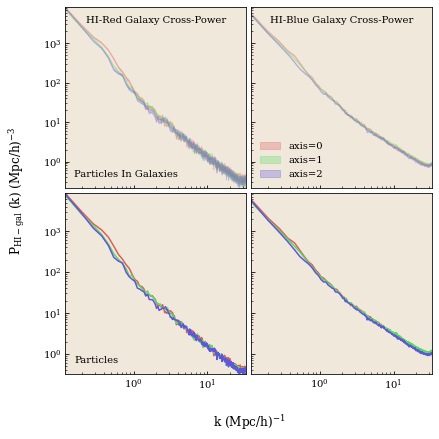

In [36]:
fig